# run rebuilding500.py

In [4]:

from tool import *
from sklearn.metrics import r2_score,mean_squared_error

for year in [2002,2011,2013,2019]:
    yy=[]
    mm=[]
    v_rb=[]
    v_s=[]
    coords_y=[]
    coords_x=[]
    saz_Ls=[]
    for m in range(1,13):
        v_rb_m=[]
        v_s_m=[]
        rebuilding=rasterio.open(root_path+f"albedo_rebuilding/rebuilding2_albedo_{year}_{m}.tif").read(1)
        # rebuilding[rebuilding>=1]=np.nan#(sza>70)
        source=rasterio.open(root_path+f'albedo_rebuilding/source2_{year}_{m}_sw_albedo2.tif').read(1)
        n=0
        print(year,m)
        for i in range(1000000):
            y,x=random.randint(0,40075),random.randint(0,80151)
            v_rebuilding,v_source=rebuilding[y,x],source[y,x]
            if v_rebuilding!=0 and v_source!=0:
                if np.isnan(v_rebuilding) or np.isnan(v_source):
                    continue
                else:
                    if v_rebuilding>=1:
                        saz_Ls.append(1)
                        v_rebuilding-=1
                    else:
                        saz_Ls.append(0)
                    yy.append(year)
                    mm.append(m)
                    v_rb_m.append(v_rebuilding)
                    v_s_m.append(v_source)
                    coords_y.append(y)
                    coords_x.append(x)
                    n+=1
                    if n==50000:
                        break
        v_s+=v_s_m
        v_rb+=v_rb_m
        
        print(r2_score(v_s_m,v_rb_m))
        print(mean_squared_error(v_s_m,v_rb_m))
    print('------------------------------all------------------------------')
    print(r2_score(v_s,v_rb))
    print(mean_squared_error(v_s,v_rb))
    pd.DataFrame.from_dict({'year':yy,'month':mm,'y':coords_y,'x':coords_x,'truth':v_s,'rebuilding':v_rb,'sza_L':saz_Ls}).to_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_{year}.csv')




2002 1
0.9414247866118213
0.005338843894751273
2002 2
0.8951038569256233
0.009319365111696187
2002 3
0.7628592216145481
0.019966701220200923
2002 4
0.8497499231871488
0.009401555213032712
2002 5
0.8611627334315124
0.006461833944564048
2002 6
0.8862106219862247
0.002808511435906371
2002 7
0.9393087980176722
0.0011280049657717043
2002 8
0.9393254376797208
0.0014935945862290941
2002 9
0.9044580701698953
0.005683936513060261
2002 10
0.9417025909059598
0.0056085895531670735
2002 11
0.9636716627045903
0.0035007619258461426
2002 12
0.9539085803331899
0.00425166848619517
------------------------------all------------------------------
0.9178175128275355
0.006246947237535083
2011 1
0.9166760020636071
0.007376946690122009
2011 2
0.8508977707484738
0.01264778289086935
2011 3
0.647563735570519
0.029720238197137473
2011 4
0.8506672460931346
0.009836728404518335
2011 5
0.885641515612043
0.005037408242710278
2011 6
0.9014626637996218
0.002217694145251984
2011 7
0.947616663330861
0.0009149524412649276


In [37]:
kk=[]
for y in range(2001,2021):
    
    # print(f'{y} <70')
    kk.append(pd.read_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_{y}.csv'))
kkk=pd.concat(kk)
kkk.to_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_{y}.csv')


kkk_70=kkk[kkk.sza_L<1]
print('<70')
print('r2:',r2_score(kkk_70['truth'],kkk_70['rebuilding']))
print('rmse:',mean_squared_error(kkk_70['truth'],kkk_70['rebuilding']))

print('<85')
print('r2:',r2_score(kkk['truth'],kkk['rebuilding']))
print('rmse:',mean_squared_error(kkk['truth'],kkk['rebuilding']))

<70
r2: 0.9556916482344705
rmse: 0.0028076118854621847
<85
r2: 0.9115171998573391
rmse: 0.006752213531150913


In [5]:

for y in range(2001,2021):

    print(f'{y} <70')
    aaa=pd.read_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_{y}.csv')
    bbb=aaa[aaa.sza_L<1]
    print('r2:',r2_score(bbb['truth'],bbb['rebuilding']))
    print('rmse:',mean_squared_error(bbb['truth'],bbb['rebuilding']))
print('---------------------')
for y in range(2001,2021):   
    print(f'{y} <85')
    aaa=pd.read_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_{y}.csv')
    bbb=aaa[aaa.sza_L<=1]
    print('r2:',r2_score(bbb['truth'],bbb['rebuilding']))
    print('rmse:',mean_squared_error(bbb['truth'],bbb['rebuilding']))


2001 <70
r2: 0.9523411490166783
rmse: 0.003096144426739914
2002 <70


r2: 0.9511473542448975
rmse: 0.0031118796857974454
2003 <70
r2: 0.9546182148804141
rmse: 0.0028691535568461197
2004 <70
r2: 0.9543428594623231
rmse: 0.002891732871993363
2005 <70
r2: 0.9570482971373228
rmse: 0.0027017316682074978
2006 <70
r2: 0.9577650880234724
rmse: 0.0026656763345271946
2007 <70
r2: 0.9566224039697354
rmse: 0.002732196814494195
2008 <70
r2: 0.9562617316280582
rmse: 0.002746793614014683
2009 <70
r2: 0.9549504899043966
rmse: 0.0028547105169496483
2010 <70
r2: 0.9563048208413814
rmse: 0.002774180044177675
2011 <70
r2: 0.9552079724504507
rmse: 0.0028423901904369117
2012 <70
r2: 0.9577337476052062
rmse: 0.002676808888164194
2013 <70
r2: 0.9551488414789995
rmse: 0.002858540260985753
2014 <70
r2: 0.9558245403138557
rmse: 0.002782844717294972
2015 <70
r2: 0.9582731825887248
rmse: 0.0026090469944187807
2016 <70
r2: 0.9586525615101653
rmse: 0.0025844843819731044
2017 <70
r2: 0.9557874373011094
rmse: 0.0028206151887823273
2018 <70
r2: 0.9547543984799918
rmse: 0.0029237665702746

In [4]:
np.int32

numpy.int32

In [5]:
from tool import *
for y in [2001,2020]:
    img_y=np.zeros((40076, 80152)).astype(np.float32)
    count=np.zeros((40076, 80152))
    for m in range(1,13):
        print(y,m)
        now=datetime.datetime.strptime(f'2001-{m}-1', '%Y-%m-%d')
        month_time=(now+relativedelta(months=1)-now).total_seconds()
        # img_source=rasterio.open(f"/data/hk/albedo/albedo_rebuilding/source2_{y}_{m}_sw_albedo2.tif").read(1)
        img=rasterio.open(f"/data/hk/albedo/albedo_rebuilding/rebuilding2_albedo_{y}_{m}.tif").read(1)
        img[img>=1]=np.nan
        # img_source[img==0]=np.nan
        # img_source[np.isnan(img)]=np.nan
        # img[(~np.isnan(img_source))]=img_source[(~np.isnan(img_source))]
        count[~np.isnan(img)]+=month_time
        img[np.isnan(img)]=0
        img_y+=(img*month_time)
        del img
        gc.collect()
    img_y/=count
    tif_save_snowfre(img_y,f"/data2/hzy/albedo/albedo_rebuilding/rebuilding2_albedo_{y}_kernel.tif",global_trf,p='4326')
    del img_y,count
    gc.collect()
img_2001=rasterio.open("/data2/hzy/albedo/albedo_rebuilding/rebuilding2_albedo_2001_kernel.tif").read(1)
img_2020=rasterio.open("/data2/hzy/albedo/albedo_rebuilding/rebuilding2_albedo_2020_kernel.tif").read(1)
dif=img_2020-img_2001
tif_save_snowfre(dif,"/data2/hzy/albedo/albedo_rebuilding/rebuilding2_albedo_2020-2001_kernel.tif",global_trf,p='4326')

2001 1
2001 2
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2001 11
2001 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


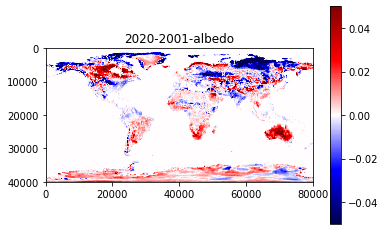

In [6]:
# img_2001=rasterio.open("/data/hk/albedo/albedo_rebuilding/rebuilding2_albedo_2001.tif").read(1)
# img_2020=rasterio.open("/data/hk/albedo/albedo_rebuilding/rebuilding2_albedo_2020.tif").read(1)
plt.title(f'2020-2001-albedo')
plt.imshow(dif,vmax=0.05,vmin=-0.05,cmap='seismic')
plt.colorbar()
plt.show()

In [2]:
from tool import *
for y in [2001,2020]:
    img_y=np.zeros((40076, 80152)).astype(np.float32)
    # count=np.zeros((40076, 80152))
    for m in range(1,13):
        print(y,m)
        
        img=rasterio.open(f"/data/hk/albedo/albedo_rebuilding/rebuilding2_albedo_{y}_{m}.tif").read(1)
        # img_source=rasterio.open(f"/data/hk/albedo/albedo_rebuilding/source2_{y}_{m}_sw_albedo2.tif").read(1)
        img[img>=1]=img[img>=1]-1
        # img_source[img==0]=np.nan
        # img_source[np.isnan(img)]=np.nan
        # img[(~np.isnan(img_source))]=img_source[(~np.isnan(img_source))]
        now=datetime.datetime.strptime(f'2001-{m}-1', '%Y-%m-%d')
        month_time=(now+relativedelta(months=1)-now).total_seconds()
        # count+=((~np.isnan(img)).astype(np.int8))*month_time
        img[img==0]=np.nan
        # del img_source
        # gc.collect()
        sw=torch.load(f"/data/hk/albedo/SW_MERRA2/{m}_SW_1degree_kernel.pth")
        sw=resample_wb_fraction(sw,width=80152,height=40076,resample_alg = gdalconst.GRIORA_NearestNeighbour)

        
        eg=(1-img)*sw*month_time
        eg[np.isnan(eg)]=0
        del img,sw
        gc.collect()
        img_y+=eg 
        # raise()
    y_len=365*24*3600
    img_y/=y_len
    tif_save_snowfre(img_y,f"/data2/hzy/albedo/albedo_rebuilding/rebuilding2_EG_{y}_kernel.tif",global_trf,p='4326')
    del img_y
    gc.collect()
img_2001=rasterio.open("/data2/hzy/albedo/albedo_rebuilding/rebuilding2_EG_2001_kernel.tif").read(1)
img_2020=rasterio.open("/data2/hzy/albedo/albedo_rebuilding/rebuilding2_EG_2020_kernel.tif").read(1)
dif=img_2020-img_2001
tif_save_snowfre(dif,"/data2/hzy/albedo/albedo_rebuilding/rebuilding2_RF_2020-2001_kernel.tif",global_trf,p='4326')

2001 1
2001 2
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2001 11
2001 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


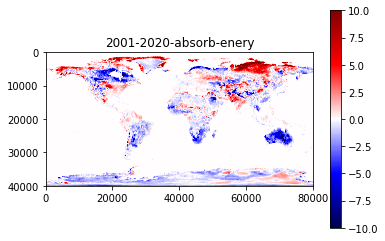

In [3]:
plt.title(f'2001-2020-absorb-enery')
plt.imshow(dif,vmax=10,vmin=-10,cmap='seismic')
plt.colorbar()
plt.show()


In [ ]:
f"/ssd_hzy/albedo_rebuilding/rebuilding2_albedo_{year}_{month}.tif"

In [1]:
from tool import *
for y in [2001,2020]:
    img_y=np.zeros((40076, 80152)).astype(np.float32)
    count=np.zeros((40076, 80152)).astype(np.int8)
    for m in range(1,13):
        print(y,m)
        # img_source=rasterio.open(f"/data/hk/albedo/albedo_rebuilding/source2_{y}_{m}_sw_albedo2.tif").read(1)
        img=rasterio.open(f"/ssd_hzy/albedo_rebuilding/rebuilding2_albedo_{y}_{m}.tif").read(1)
        img[img>=1]=np.nan
        # img_source[img==0]=np.nan
        # img_source[np.isnan(img)]=np.nan
        # img[(~np.isnan(img_source))]=img_source[(~np.isnan(img_source))]
        count+=((~np.isnan(img)).astype(np.int8))
        img[np.isnan(img)]=0
        img_y+=img
        del img
        gc.collect()
    img_y/=count
    tif_save_snowfre(img_y,f"/ssd_hzy/albedo_rebuilding/rebuilding2_albedo_{y}.tif",global_trf,p='4326')
    del img_y,count
    gc.collect()
img_2001=rasterio.open(f"/ssd_hzy/albedo_rebuilding/rebuilding2_albedo_2001.tif").read(1)
img_2020=rasterio.open(f"/ssd_hzy/albedo_rebuilding/rebuilding2_albedo_2020.tif").read(1)
dif=img_2020-img_2001
tif_save_snowfre(dif,f"/ssd_hzy/albedo_rebuilding/dif_albedo_2001-2020.tif",global_trf,p='4326')

2001 1
2001 2
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2001 11
2001 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


In [1]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
lc01[lc01==20]=0
lc01[lc20==20]=0
img=rasterio.open(f"/ssd_hzy/albedo_rebuilding/dif_albedo_2001-2020.tif").read(1)
img[lc01==16]=0
img[lc01==17]=0 
img[lc01==15]=0  
plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
plt.colorbar()
plt.show()

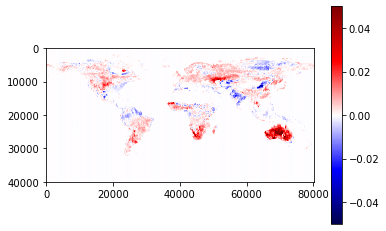

In [2]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0

img=rasterio.open(f"/ssd_hzy/albedo_rebuilding/dif_albedo_2001-2020.tif").read(1)
img[np.isnan(img)]=0
img=img*z
plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
plt.colorbar()
plt.show()


In [9]:
import pandas as pd
from tool import *
a=pd.read_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_2020.csv')

In [17]:
a=a[-600000:]

In [18]:
a.to_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_2020.csv')

In [4]:
len(a[a.year==2001])

1200000

In [8]:
12*5

60

In [1]:
# kk=[]
# for y in range(2001,2021):
    
#     # print(f'{y} <70')
#     kk.append(pd.read_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val_{y}.csv'))
# kkk=pd.concat(kk)
# kkk.to_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val.csv')
from tool import *
from sklearn.metrics import r2_score,mean_squared_error
kkk=pd.read_csv(root_path+f'albedo_rebuilding/rebuilding_usemean_val.csv')
kkk=kkk[kkk['rebuilding']!=0]
kkk_70=kkk[kkk.sza_L<1]
print('<70')
print('r2:',r2_score(kkk_70['truth'],kkk_70['rebuilding']))
print('rmse:',np.sqrt(mean_squared_error(kkk_70['truth'],kkk_70['rebuilding'])))

print('<85')
print('r2:',r2_score(kkk['truth'],kkk['rebuilding']))
print('rmse:',np.sqrt(mean_squared_error(kkk['truth'],kkk['rebuilding'])))

<70
r2: 0.9556866075432662
rmse: 0.0028078730564940523
<85
r2: 0.9113940593699923
rmse: 0.00676201868389511


In [ ]:
x,y=kkk['rebuilding'],kkk['truth']
R2 = r2_score(x,y)
xy = np.vstack([x, y])
# z=stats.gaussian_kde(xy)(xy)
# idx=z.argsort()
# x, y, z = x.iloc[idx], y.iloc[idx], z[idx]
def slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b
k, b = slope(x, y)
regression_line = []
for a in range(100000):
    regression_line.append((k * a/100000) + b)
    
MSE = mean_squared_error(y,x)  
RMSE = np.power(MSE, 0.5)
R2 = r2_score(y,x)

# fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from matplotlib.ticker import MultipleLocator
norm = ImageNormalize(vmin=0., vmax=40000, stretch=LogStretch())
fig = plt.figure(figsize=(8, 6), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
# scatter = ax.scatter(x, y, marker='o', c=z * 100, edgecolors=None, s=5, cmap='RdBu_r',  alpha=0.8)
# cbar = plt.colorbar(scatter, shrink=1, orientation='vertical', extend='both', pad=0.01, aspect=30, label='Frequency')
density = ax.scatter_density(x, y, cmap='hot_r',norm=norm)
cbar=fig.colorbar(density, shrink=1, orientation='vertical', extend='both', pad=0.01, aspect=30, label='Frequency')
cbar.ax.yaxis.set_major_locator(MultipleLocator(10000))
plt.plot([0, 1], [0, 1], 'red', lw=1.5, linestyle='--', label='1:1 line') 
plt.plot([i/100000 for i in range(100000)], regression_line, 'black', lw=1.5, label='Regression Line')  
ax.grid(True, linestyle='--', alpha=0.2)


plt.annotate('$R^2=%.3f$' % R2,(0.8,0.05))
plt.annotate('$RMSE=%.3f$' % RMSE,(0.8,0.1))
# plt.text(28,-12.5, '$R^2=%.3f$' % R2)
# plt.text(28,-27.5, '$RMSE=%.3f$' % RMSE)
plt.ylabel(r'Monthly blue-sky albedo recontructed from ALLUM',fontsize=10)
plt.xlabel(r'Monthly blue-sky albedo synthesized from MCD43',fontsize=10)
plt.axis([0, 1, 0,1])  # 设置线的范围
ax.legend(loc='upper left', frameon = False)
plt.savefig('./figure/rebuilding500_85_val.png',dpi=600)
plt.show()

In [1]:
import torch
from tool import *
_,sza_l=torch.load('/data/hk/albedo/SZA.pth')

1
2
3
4
5
6
7
8
9
10
11
12


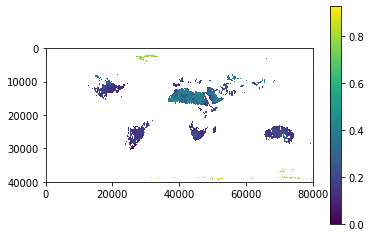

In [2]:
from tool import *
year=2020
y_img=np.zeros((40076, 80152))
count=np.zeros((40076, 80152))
for m in range(1,13):
    print(m)
    source=rasterio.open(root_path+f'albedo_rebuilding/source2_{year}_{m}_sw_albedo2.tif').read(1)
    # raise()
    SZA_L=np.ones((40076, 80152))
    SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))
    source[SZA_L>=2]=1
    y_img+=source
    del source 
    gc.collect()
    y_img[SZA_L>=2]-=1
    count[SZA_L<=1]+=1
    del SZA_L
    gc.collect()
y_img/=count
tif_save_snowfre(y_img,root_path+f'albedo_rebuilding/source2_{year}_sw_albedo2_85.tif',global_trf,p='4326')
plt.imshow(y_img)
plt.colorbar()
plt.show()
    

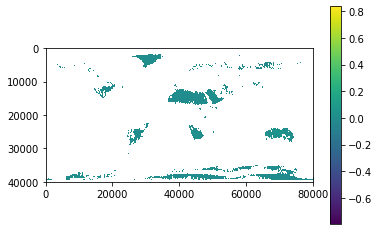

In [2]:
from tool import *
img01=rasterio.open(root_path+f'albedo_rebuilding/source2_2001_sw_albedo2.tif').read(1)
img20=rasterio.open(root_path+f'albedo_rebuilding/source2_2020_sw_albedo2.tif').read(1)
dif=img20-img01
plt.imshow(dif)
plt.colorbar()
plt.show()

In [28]:
tif_save_snowfre(dif,root_path+f'albedo_rebuilding/source2_dif2020-2001_sw_albedo2.tif',global_trf,p='4326')

In [26]:
from tool import *
dif=rasterio.open(root_path+f'albedo_rebuilding/source2_dif2020-2001_sw_albedo2.tif').read(1)
dif2=rasterio.open(root_path+f'albedo_rebuilding/rebuilding2_albedo_2020-2001.tif').read(1)

In [27]:
dif[dif2==0]=np.nan

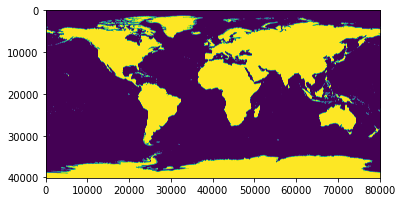

In [13]:
plt.imshow((dif2!=0))
plt.show()

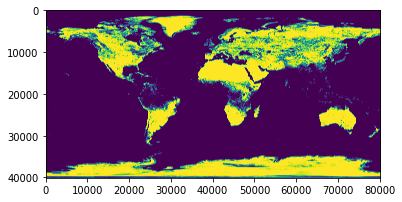

In [14]:
plt.imshow((~np.isnan(dif)))
plt.show()

In [19]:
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    

In [20]:
a=(~np.isnan(dif)).astype(np.int8)

In [21]:
b=(dif2!=0).astype(np.int8)

In [22]:
del dif,dif2
gc.collect()

392

In [23]:
(np.array(k).reshape(-1,1)*a).sum()

103556509324634.06

In [24]:
(np.array(k).reshape(-1,1)*b).sum()

148043644946143.72

In [25]:
103556509324634.06/148043644946143.72

0.6994998627756465

In [12]:
813982497/1071914275

0.7593727558110932

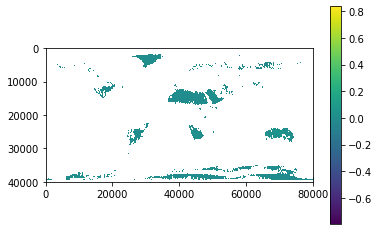

In [7]:
plt.imshow(dif)
plt.colorbar()
plt.show()

In [9]:
dif.shape

(40076, 80152)

In [13]:
80152/360

222.64444444444445

In [14]:
223*360-80152

128

In [17]:
dif_p=np.pad(dif,((0,64),(0,128)),'constant',constant_values = (np.nan,np.nan))

In [21]:
del dif2
gc.collect()

78

In [20]:
dif2_p=np.pad(dif2,((0,64),(0,128)),'constant',constant_values = (np.nan,np.nan))

1
2
3
4
5
6
7
8
9
10
11
12


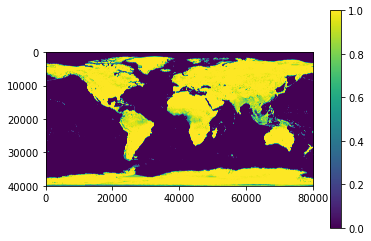

In [2]:
year=2020
y_img=np.zeros((40076, 80152))
count=np.zeros((40076, 80152))
for m in range(1,13):
    print(m)
    source=rasterio.open(root_path+f'albedo_rebuilding/source2_{year}_{m}_sw_albedo2.tif').read(1)
    # raise()
    SZA_L=np.ones((40076, 80152))
    SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))
    source[SZA_L>=1]=np.nan
    y_img[~np.isnan(source)]+=1
    del source 
    gc.collect()
    count[SZA_L==0]+=1
    del SZA_L
    gc.collect()
y_img/=count
tif_save_snowfre(y_img,root_path+f'albedo_rebuilding/source2_{year}_sw_albedo_frequence.tif',global_trf,p='4326')
plt.imshow(y_img)
plt.colorbar()
plt.show()


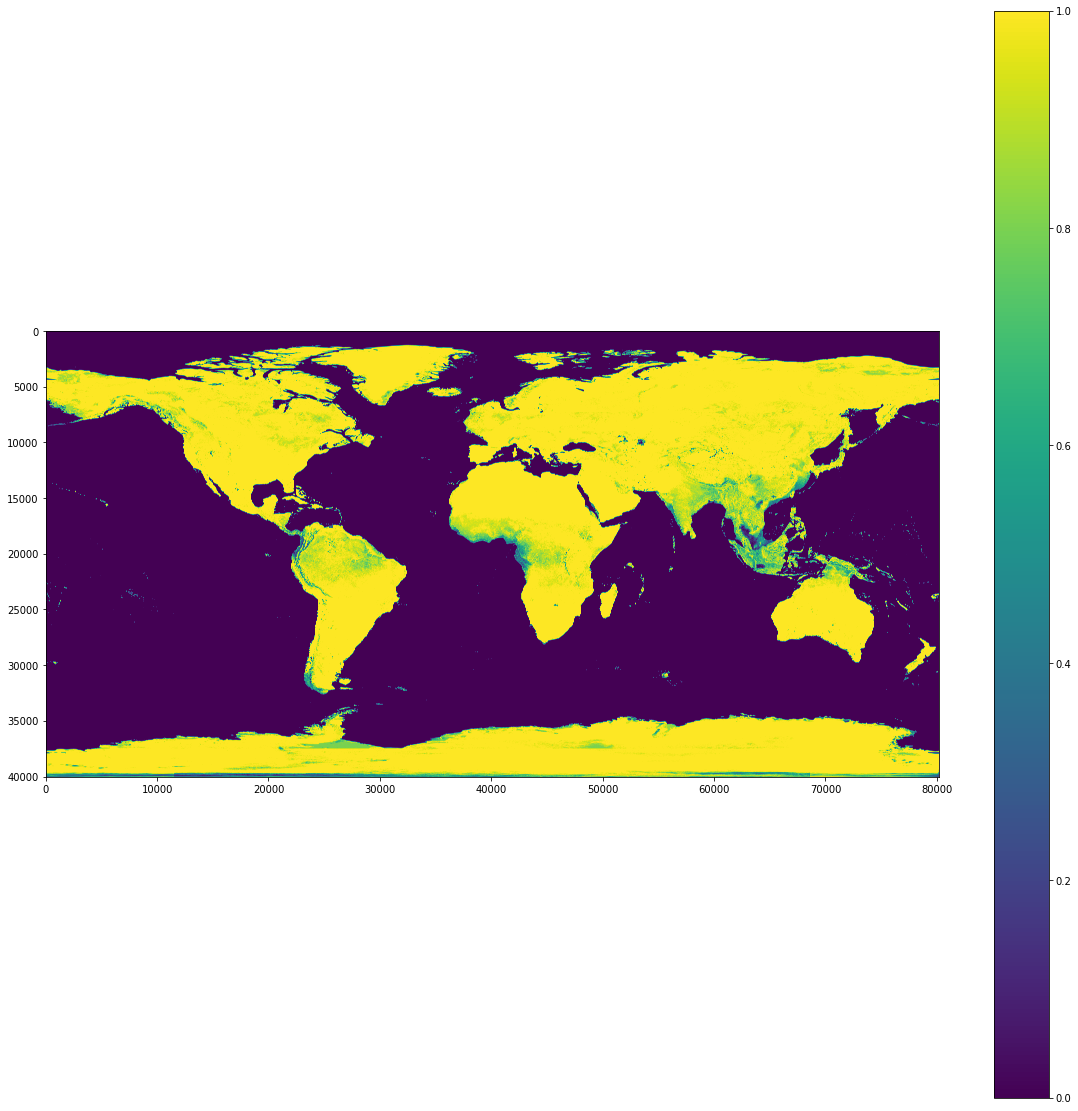

In [3]:
from tool import *
year=2020
y_img=rasterio.open(root_path+f'albedo_rebuilding/source2_{year}_sw_albedo_frequence.tif').read(1)
plt.figure(figsize=(20,20))
plt.imshow(y_img)
plt.colorbar()
plt.show()

In [ ]:
source[np.isnan(source)]=2

In [6]:
source=rasterio.open(root_path+f'albedo_rebuilding/source2_dif2020-2001_sw_albedo2.tif').read(1)
plt.figure(figsize=(20,20),dpi=600)
plt.imshow(source)
plt.colorbar()
plt.show()


In [ ]:
y_img=np.zeros((40076, 80152))
count=np.zeros((40076, 80152))
for year in range(2001,2021):
    for m in range(1,13):
        print(m)
        source=rasterio.open(root_path+f'albedo_rebuilding/source2_{year}_{m}_sw_albedo2.tif').read(1)
        # raise()
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))
        source[SZA_L>=2]=np.nan
        y_img[~np.isnan(source)]+=1
        del source 
        gc.collect()
        count[SZA_L<=1]+=1
        del SZA_L
        gc.collect()
y_img/=count
# tif_save_snowfre(y_img,root_path+f'albedo_rebuilding/source2_{year}_sw_albedo2.tif',global_trf,p='4326')
plt.imshow(y_img)
plt.colorbar()
plt.show()

In [1]:
import netCDF4 as nc

In [2]:
nf=nc.Dataset("/data2/hzy/albedo/alb.kernel.nc")

In [6]:
-90.+89.05759162

-0.9424083800000034

In [7]:
nc

<module 'netCDF4' from '/home/ubuntu/anaconda3/envs/pythonhzy/lib/python3.7/site-packages/netCDF4/__init__.py'>

In [17]:
180/191

0.9424083769633508

In [15]:
nf.variables['lat'][:]

masked_array(data=[-90.        , -89.05759162, -88.11518325, -87.17277487,
                   -86.23036649, -85.28795812, -84.34554974, -83.40314136,
                   -82.46073298, -81.51832461, -80.57591623, -79.63350785,
                   -78.69109948, -77.7486911 , -76.80628272, -75.86387435,
                   -74.92146597, -73.97905759, -73.03664921, -72.09424084,
                   -71.15183246, -70.20942408, -69.26701571, -68.32460733,
                   -67.38219895, -66.43979058, -65.4973822 , -64.55497382,
                   -63.61256545, -62.67015707, -61.72774869, -60.78534031,
                   -59.84293194, -58.90052356, -57.95811518, -57.01570681,
                   -56.07329843, -55.13089005, -54.18848168, -53.2460733 ,
                   -52.30366492, -51.36125654, -50.41884817, -49.47643979,
                   -48.53403141, -47.59162304, -46.64921466, -45.70680628,
                   -44.76439791, -43.82198953, -42.87958115, -41.93717277,
                   -40.99

In [16]:
1.41361257-0.47120419

0.9424083799999999

In [9]:
nf.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (288,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [18]:
360/287

1.254355400696864

In [1]:
from tool import *
nf=nc.Dataset("/data2/hzy/ssd_hzy/MODIS_Blue_Sky_Albedo_Climatology.h01v08.005.nc")


In [2]:
nf.variables['snowfree_alb_clim']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): row(2400), col(2400)
    variables(dimensions): int16 hist_alb_clim(col, row), int16 snowfree_alb_clim(col, row), int8 hist_alb_clim_number(col, row), int8 snowfree_alb_clim_number(col, row)
    groups: 

In [5]:
plt.imshow(nf.variables['hist_alb_clim'][:])

ValueError: invalid literal for int() with base 10: '(0,1000)'

In [10]:
nf.variables['snowfree_alb_clim'][:].shape

ValueError: invalid literal for int() with base 10: '(0,1000)'

In [9]:
nf.variables['hist_alb_clim']

ValueError: invalid literal for int() with base 10: '(0,1000)'